## Import necessary libraries 

In [7]:
import numpy as np
from keras import layers, models
import matplotlib.pyplot as plt

## 1. Image Statistics

This function calculates the resolution of an image and counts the number of dark pixels across the three color channels (Red, Green, Blue) based on a given darkness threshold.

In [8]:
def image_statistics(image, darkness):
     # Get image resolution (width, height)
     resolution = image.shape[:2] 
     # Count dark pixes in 3 channels based on the darkness threshold
     dark_pixels = tuple(np.sum(image[:, :, i] < darkness)for i in range (3))
     return {'resolution': resolution, 'dark_pixels': dark_pixels}


In [10]:
# Define a small 2x3 image with 3 color channels (Red, Green, Blue)
image = np.array([[[250, 2, 2], [0, 255, 2], [0, 0, 255]], 
                  [[2, 2, 20], [250, 255, 255], [127, 127, 127]]])
# Define darkness threshold
darkness_threshold = 10

# Call the image_statistics function to get the statistics of the image
stats = image_statistics(image, darkness_threshold)

# Print the results
# 'resolution' will show the dimensions of the image (height, width)
# 'dark_pixels' will show how many pixels in each channel are below the darkness threshold
print("Image Statistics:", stats)

Image Statistics: {'resolution': (2, 3), 'dark_pixels': (3, 3, 2)}


- 'resolution': The image has 2 rows and 3 columns, so the resolution is (2, 3).
- 'dark_pixels': 
    - Red channel: 3 pixels have values < 10 (0, 0, 2).
    - Green channel: 3 pixels have values < 10 (2, 2, 0).
    - Blue channel: 2 pixels have values < 10 (2, 2).



# 2. Bounding Box

This function extracts a sub-section of an image defined by a bounding box,

In [11]:
def bounding_box(image, top_left, bottom_right):
    # Extract the rows and columns from the top_left and bottom_right tuples
    top_left_row, top_left_column = top_left
    bottom_right_row, bottom_right_column = bottom_right
    
    # Return a sub-section of the image determined by the bounding box
    # The slice image[top_left_row:bottom_right_row + 1, top_left_column:bottom_right_column + 1]
    # extracts the pixels from top_left to bottom_right, inclusive of the bottom_right coordinates
    return image[top_left_row:bottom_right_row + 1, top_left_column:bottom_right_column + 1]

In [16]:
# Define a small 2x3 image with 3 color channels (Red, Green, Blue)
image1 = np.array([[[250, 2, 2], [0, 255, 2], [0, 0, 255]], 
                  [[2, 2, 20], [250, 255, 255], [127, 127, 127]]])
# Define the top-left and bottom-right coordinates of the bounding box
top_left = (0, 0)
bottom_right = (1, 1)

# Extract the bounding box from the image
bbox = bounding_box(image1, top_left, bottom_right)

# Print the extracted bounding box
# The output will be a smaller image array corresponding to the specified bounding box
print("Bounding Box Extracted:\n", bbox)

Bounding Box Extracted:
 [[[250   2   2]
  [  0 255   2]]

 [[  2   2  20]
  [250 255 255]]]


- The extracted bounding box includes the pixels from row 0 to 1 and column 0 to 1
- This corresponds to the top-left 2x2 portion of the original image.

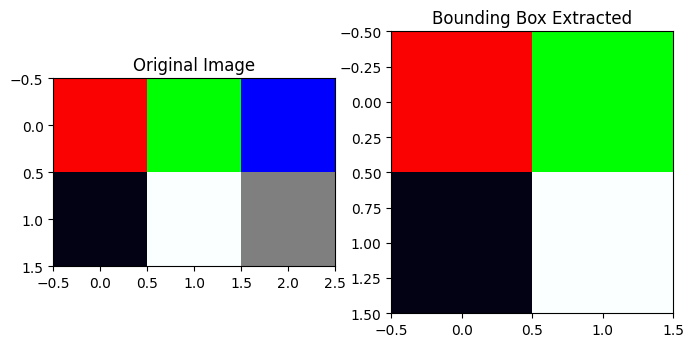

In [17]:
# Visualize the original image and the extracted bounding box
plt.figure(figsize=(8, 4))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# Plot the extracted bounding box
plt.subplot(1, 2, 2)
plt.imshow(bbox)
plt.title("Bounding Box Extracted")

# Display the plots
plt.show()

**Bounding Box Functionality**: 
- The function bounding_box() successfully extracted the specified region from the original image. The extracted bounding box corresponds to the top-left 2x2 portion of the image, accurately capturing the desired section.

**Visualization**:
- Original Image: The visualization of the original image helps in understanding the spatial arrangement and color distribution across the entire image.
- Bounding Box: The extracted bounding box plot confirms that only the desired section of the image is included, highlighting the effectiveness of the bounding box operation.
  
**Practical Applications**:
- This functionality is particularly useful in image processing tasks where specific regions of interest need to be isolated, such as object detection, cropping, or focusing on certain details within an image.

# 3. Build Deep Neural Network

This function builds a deep neural network with a specified number of hidden layers,each with a given size and optional dropout, culminating in an output layer with a specific activation function.

In [18]:
def build_deep_nn(rows, columns, channels, num_hidden, hidden_sizes, dropout_rates,
                  output_size, output_activation):
    # Initialize a sequential model
    model = models.Sequential()  
    
    # Flatten the input image to a single vector
    # This is necessary because fully connected layers expect a 1D input, not a 2D image
    model.add(layers.Flatten(input_shape=(rows, columns, channels)))
    
    # Add the specified number of hidden layers with ReLU activation and optional dropout
    for i in range(num_hidden):
        # Add a Dense layer with the specified size
        model.add(layers.Dense(hidden_sizes[i], activation='relu'))
        
        # If the dropout rate for this layer is greater than 0, add a Dropout layer
        if dropout_rates[i] > 0:
            model.add(layers.Dropout(dropout_rates[i]))
    
    # Add the final Dense layer with the specified output size and activation function
    model.add(layers.Dense(output_size, activation=output_activation))
    
    # Return the constructed model
    return model

In [19]:
# Defining the parameters for the neural network
rows, columns, channels = 45, 34, 3   # Input image dimensions (height, width, channels)
num_hidden = 2                        # Number of hidden layers
hidden_sizes = [40, 20]               # Sizes of each hidden layer
dropout_rates = [0, 0.5]              # Dropout rates for each hidden layer (0 means no dropout)
output_size = 3                       # Size of the output layer (e.g., 3 classes for classification)
output_activation = 'sigmoid'         # Activation function for the output layer

# Build the model using the specified parameters
model = build_deep_nn(rows, columns, channels, num_hidden, hidden_sizes, dropout_rates, output_size, output_activation)

# Display the summary of the model to show its structure
# The summary will include the number of layers, the output shape of each layer, and the number of parameters
model.summary()

/Users/viviannguyen/anaconda3/envs/python310/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4590)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │       183,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,523 (720.79 KB)

 Trainable params: 184,523 (720.79 KB)

 Non-trainable params: 0 (0.00 B)

*Layers of the Model*:

1. **Flatten Layer (`flatten`)**:
   - **Type**: `Flatten`
   - **Output Shape**: `(None, 4590)`
   - **Parameters**: `0`
   - **Explanation**: 
     - This layer takes the input image of shape `(45, 34, 3)` (45 rows, 34 columns, 3 channels) and flattens it into a 1D vector. The output shape `(4590)` is calculated by multiplying the dimensions: \(45 x 34 x 3 = 4590\).
     - No parameters are learned in this layer since it's just a reshaping operation.

2. **First Dense Layer (`dense`)**:
   - **Type**: `Dense`
   - **Output Shape**: `(None, 40)`
   - **Parameters**: `183,640`
   - **Explanation**: 
     - This is a fully connected (dense) layer with 40 neurons.
     - The number of parameters is calculated as: \( *input size* x *output size* + *biases* = 4590 x 40 + 40 = 183,640 \).
     - This layer is responsible for learning features by applying a weighted sum and an activation function (ReLU in this case).

1. **Second Dense Layer (`dense_1`)**:
   - **Type**: `Dense`
   - **Output Shape**: `(None, 20)`
   - **Parameters**: `820`
   - **Explanation**:
     - This layer has 20 neurons and connects to the previous dense layer.
     - The number of parameters is calculated as: \( *input size* x *output size* + *biases* = 40 x 20 + 20 = 820 \).
     - Like the first dense layer, this layer also applies a weighted sum and ReLU activation, helping to refine the learned features.

2. **Dropout Layer (`dropout`)**:
   - **Type**: `Dropout`
   - **Output Shape**: `(None, 20)`
   - **Parameters**: `0`
   - **Explanation**:
     - The dropout layer randomly sets a fraction of input units to 0 during training, helping to prevent overfitting.
     - The dropout rate was set to 0.5 (50%) in the provided model. However, dropout layers do not have any learnable parameters, which is why the parameter count is `0`.
     - The output shape remains the same as the input shape.

3. **Final Dense Layer (`dense_2`)**:
   - **Type**: `Dense`
   - **Output Shape**: `(None, 3)`
   - **Parameters**: `63`
   - **Explanation**:
     - This is the output layer of the network, which has 3 neurons, corresponding to a classification problem with 3 classes.
     - The number of parameters is calculated as: \( *input size* x *output size* + *biases* = 20 x 3 + 3 = 63 \).
     - The activation function used here is `sigmoid`, which is common for binary or multi-class classification tasks where the output is interpreted as probabilities.

#### Summary of the Model:

- **Total Parameters**: `184,523`
  - This represents the total number of parameters (weights and biases) that the model will learn during training.
  - The large number of parameters indicates that the model has significant capacity to learn complex patterns from the data.
  
- **Trainable Parameters**: `184,523`
  - All parameters in this model are trainable, meaning they will be updated during the training process to minimize the loss function.

- **Non-trainable Parameters**: `0`
  - There are no non-trainable parameters in this model, which could include things like frozen layers in transfer learning scenarios.

#### Explanation and Commentary:

- **Model Architecture**: 
  - The model begins with a `Flatten` layer that prepares the image data for the fully connected layers.
  - Two fully connected layers (`Dense`) are included, with the first having a larger number of neurons (40) to capture a broad range of features, and the second refining those features with fewer neurons (20).
  - A `Dropout` layer is included between the two dense layers to prevent overfitting by randomly setting 50% of the inputs to 0 during training.
  - The final layer produces 3 outputs, which would be used in a classification task, where each output corresponds to the probability of a particular class.

- **Training Considerations**: 
  - The model's significant number of parameters, especially in the first dense layer, indicates it has a high capacity for learning, but it also means that overfitting is a risk, which is why dropout is used.
  - Proper regularization and sufficient training data are essential to ensure the model generalizes well.

- **Application**: 
  - This model architecture is suitable for tasks like image classification where the input is an image and the output is a classification into one of three categories.